In [11]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

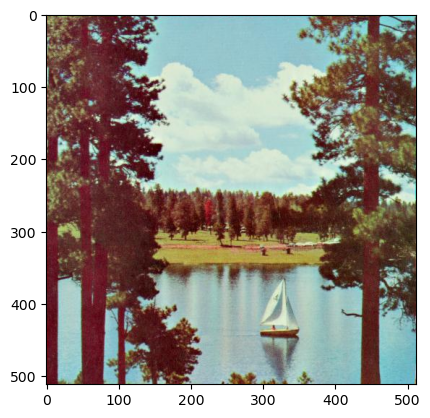

In [12]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [13]:
def extract_im_channel(image, channel: int):
    image_new = np.empty([512, 512])
    for i, width in enumerate(image):
        for j, color in enumerate(width):
            image_new[i][j] = image[i][j][channel]
    return image_new

In [14]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    for i in range(img_size):
        added = i + kernel_size
        if added <= img_size:
            num_pixels += 1
            
    return num_pixels

In [15]:
def apply_image_padding(im_to_be_padded, reference_im):
    padded_im = np.zeros(reference_im.shape)
    padded_im[:im_to_be_padded.shape[0],:im_to_be_padded.shape[1]] = im_to_be_padded    
    return padded_im

In [16]:
def convolve_im_single_channel(im, kernel):
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=im.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = im[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
    
    convolved_padded_img = apply_image_padding(convolved_img, im)
    
    return convolved_padded_img

In [17]:
def concatinate_im_channels(im_smoothed_r, im_smoothed_g, im_smoothed_b):
    image_new = np.empty([512, 512, 3])
    for i, width in enumerate(im):
        for j, color in enumerate(width):
            image_new[i][j] = [im_smoothed_r[i][j], im_smoothed_g[i][j], im_smoothed_b[i][j]]
    return image_new

In [18]:


def convolve_im(im, kernel):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3


    # extract image channel
    im_r_channel = extract_im_channel(im, 0)
    im_g_channel = extract_im_channel(im, 1)
    im_b_channel = extract_im_channel(im, 2)

    # apply convolution to each image channel
    im_r_channel_convolved = convolve_im_single_channel(im_r_channel, kernel)
    im_g_channel_convolved = convolve_im_single_channel(im_g_channel, kernel)
    im_b_channel_convolved = convolve_im_single_channel(im_b_channel, kernel)

    # concatinate convolved image channel into single convolved image
    convolved_img = concatinate_im_channels(im_r_channel_convolved, im_g_channel_convolved, im_b_channel_convolved)

    return convolved_img

In [19]:

# Define the convolutional kernels

h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])


# Convolve images

im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)

im_sobel = convolve_im(im.copy(), sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)


# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

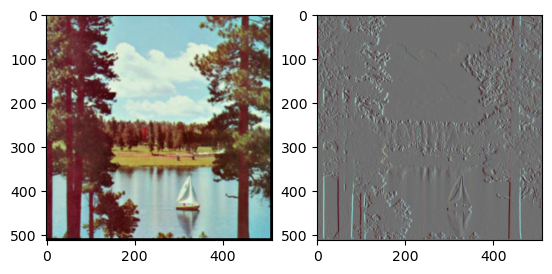

In [20]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))

plt.show()